In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("categories_datasets/2_categories.csv")
df

,coord_x,coord_y,category
0,203.175900,185.107149,a
1,178.999121,205.587416,a
2,154.055528,192.339881,a
3,211.160136,209.633947,a
4,185.962405,191.852619,a
...,...,...,...
171,462.432157,242.373334,b
172,490.564537,235.205822,b
173,444.010085,262.168997,b
174,424.691566,226.654325,b


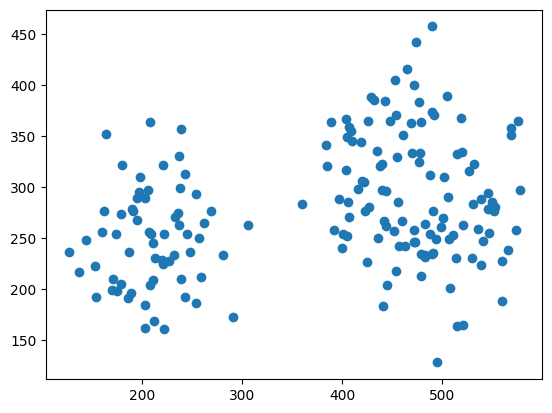

In [54]:
plt.scatter(df["coord_x"], df["coord_y"] )

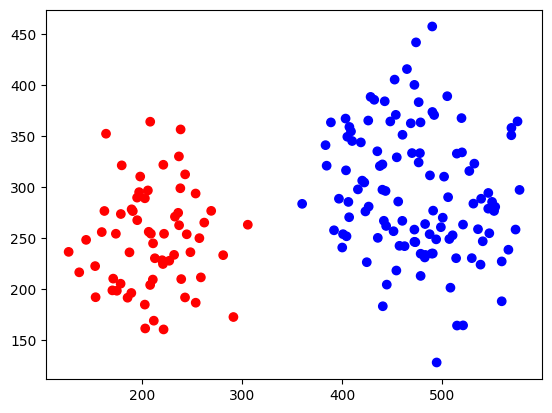

In [6]:
plt.scatter(df["coord_x"], df["coord_y"], c=df["category"].map({"a":"red", "b":"blue"}))

In [7]:
df_4cat = pd.read_csv("categories_datasets/4_categories.csv")
df_4cat

,coord_x,coord_y,category
0,124.703038,350.089618,a
1,127.948668,417.534316,a
2,80.817806,395.823458,a
3,126.107518,383.713659,a
4,121.863843,355.151238,a
...,...,...,...
913,597.447179,80.049176,d
914,552.212837,77.267115,d
915,582.085716,58.248150,d
916,581.338270,55.497262,d


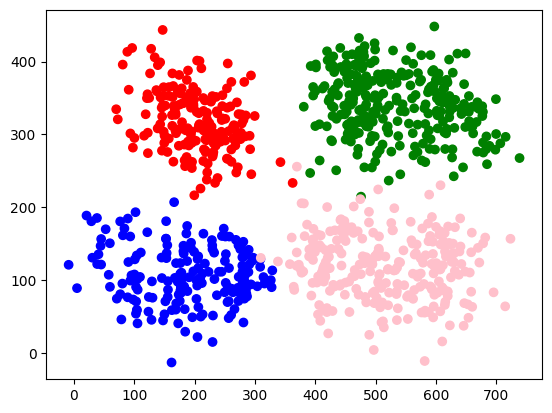

In [8]:
plt.scatter(df_4cat["coord_x"], df_4cat["coord_y"], c=df_4cat["category"].map({"a":"red", "b":"blue", "c":"green", "d":"pink"}))

In [10]:
df_4cat["category"].unique()

array(['a', 'b', 'c', 'd'], dtype=object)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt_model_2_cat = DecisionTreeClassifier()
dt_model_2_cat

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
x = df[["coord_x", "coord_y"]]
y = df[["category"]]

In [18]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((140, 2), (36, 2), (140, 1), (36, 1))

In [21]:
x_train

,coord_x,coord_y
118,415.851660,298.012238
166,540.429797,247.158699
120,401.000038,254.137116
28,179.241310,273.882305
109,549.758530,285.764762
...,...,...
138,410.073182,345.422891
161,519.708776,334.291107
137,383.533552,341.358510
49,221.893305,160.768967


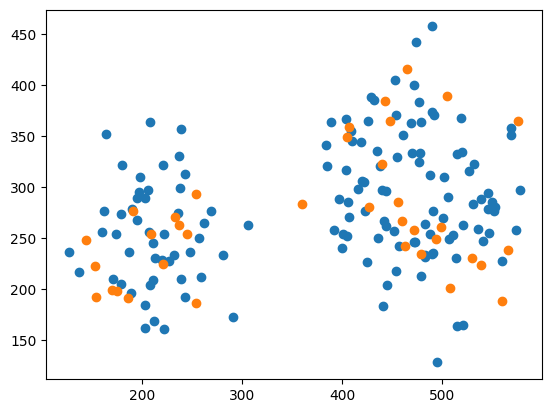

In [23]:
plt.scatter(x_train["coord_x"], x_train["coord_y"])
plt.scatter(x_test["coord_x"], x_test["coord_y"])


In [24]:
dt_model_2_cat.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# pip install graphiz

In [29]:
from sklearn.tree import export_graphviz
import graphviz

In [30]:
exported_data= export_graphviz(dt_model_2_cat, feature_names=["coord_x", "coord_y"],class_names=["a", "b"])
exported_data

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="coord_x <= 344.74\\ngini = 0.455\\nsamples = 140\\nvalue = [49, 91]\\nclass = b"] ;\n1 [label="gini = 0.0\\nsamples = 49\\nvalue = [49, 0]\\nclass = a"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 91\\nvalue = [0, 91]\\nclass = b"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [31]:
tree_graph = graphviz.Source(exported_data)
tree_graph.render("2_categories", format="png")
tree_graph.view()

'2_categories.pdf'

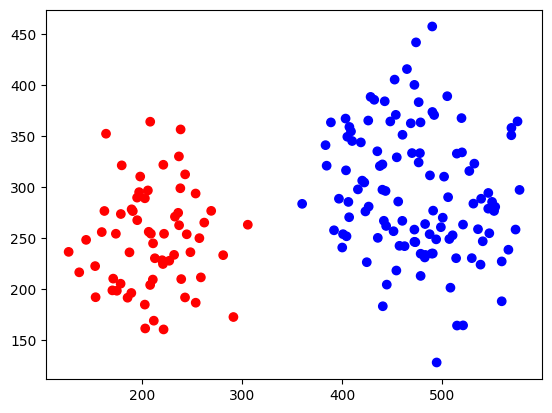

In [32]:
plt.scatter(df["coord_x"], df["coord_y"], c=df["category"].map({"a":"red", "b":"blue"}))

In [33]:
ELEMENTS_NUMBER = 500

In [34]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [35]:
linie_coord_x = np.ones(ELEMENTS_NUMBER) * 344.74
linie_coord_y = np.arange(100, 100 + ELEMENTS_NUMBER)

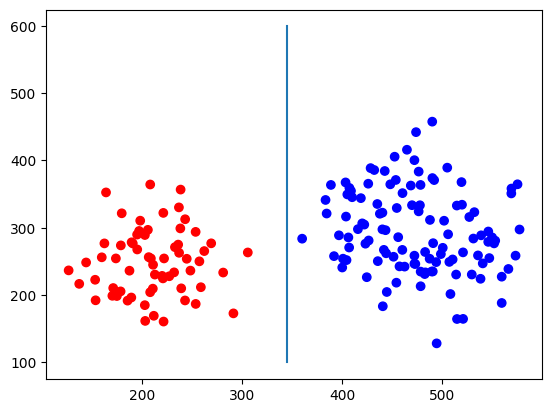

In [36]:
plt.scatter(df["coord_x"], df["coord_y"], c=df["category"].map({"a":"red", "b":"blue"}))
plt.plot(linie_coord_x, linie_coord_y)

In [37]:
x = df_4cat[["coord_x", "coord_y"]]
y = df_4cat[["category"]]
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.2)

In [38]:
dt_model_4_cat = DecisionTreeClassifier()
dt_model_4_cat.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [39]:
exported_data= export_graphviz(dt_model_4_cat, feature_names=["coord_x", "coord_y"],class_names=["a", "b", "c", "d"])
exported_data

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="coord_y <= 225.161\\ngini = 0.739\\nsamples = 734\\nvalue = [151.0, 141.0, 233.0, 209.0]\\nclass = c"] ;\n1 [label="coord_x <= 333.474\\ngini = 0.487\\nsamples = 351\\nvalue = [1, 141, 1, 208]\\nclass = d"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="coord_y <= 200.956\\ngini = 0.028\\nsamples = 143\\nvalue = [1, 141, 0, 1]\\nclass = b"] ;\n1 -> 2 ;\n3 [label="coord_x <= 309.371\\ngini = 0.014\\nsamples = 142\\nvalue = [0, 141, 0, 1]\\nclass = b"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 136\\nvalue = [0, 136, 0, 0]\\nclass = b"] ;\n3 -> 4 ;\n5 [label="coord_x <= 311.916\\ngini = 0.278\\nsamples = 6\\nvalue = [0, 5, 0, 1]\\nclass = b"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 1]\\nclass = d"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 5\\nvalue = [0, 5, 0, 0]\\nclass = b"] ;\n5 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 1\\

In [40]:
tree_graph = graphviz.Source(exported_data)
tree_graph.render("4_categories", format="png")
tree_graph.view()

'4_categories.pdf'

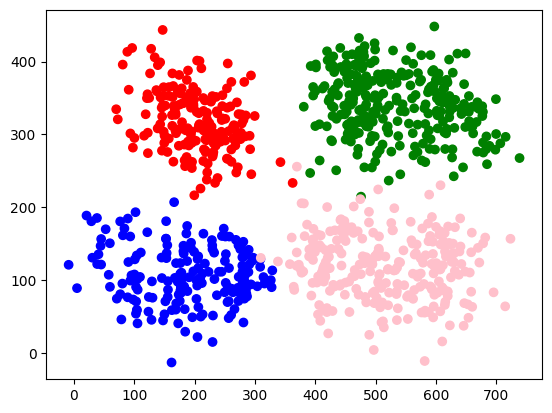

In [41]:
plt.scatter(df_4cat["coord_x"], df_4cat["coord_y"], c=df_4cat["category"].map({"a":"red", "b":"blue", "c":"green", "d":"pink"}))

In [42]:
ELEMENTS_NUMBER = 800
prima_linie_coord_x = np.arange(100, 100 + ELEMENTS_NUMBER)
prima_linie_coord_y =  np.ones(ELEMENTS_NUMBER) *  225.161

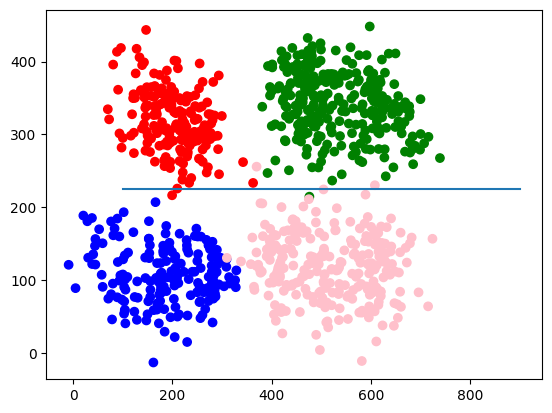

In [43]:
plt.scatter(df_4cat["coord_x"], df_4cat["coord_y"], c=df_4cat["category"].map({"a":"red", "b":"blue", "c":"green", "d":"pink"}))
plt.plot(prima_linie_coord_x, prima_linie_coord_y)

In [44]:
ELEMENTS_NUMBER = 225
a_doua_linie_coord_x = np.ones(ELEMENTS_NUMBER) *  333.474
a_doua_linie_coord_y =  np.arange(0,  ELEMENTS_NUMBER)

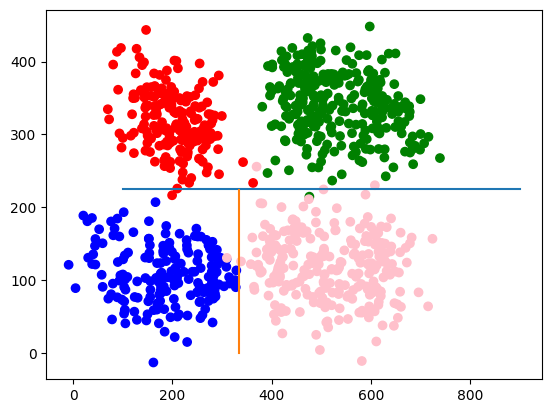

In [45]:
plt.scatter(df_4cat["coord_x"], df_4cat["coord_y"], c=df_4cat["category"].map({"a":"red", "b":"blue", "c":"green", "d":"pink"}))
plt.plot(prima_linie_coord_x, prima_linie_coord_y)
plt.plot(a_doua_linie_coord_x, a_doua_linie_coord_y)

In [48]:
ELEMENTS_NUMBER = 500 - 225
a_treia_linie_coord_x = np.ones(ELEMENTS_NUMBER) *  375.244
a_treia_linie_coord_y =  np.arange(225,  225+ ELEMENTS_NUMBER)

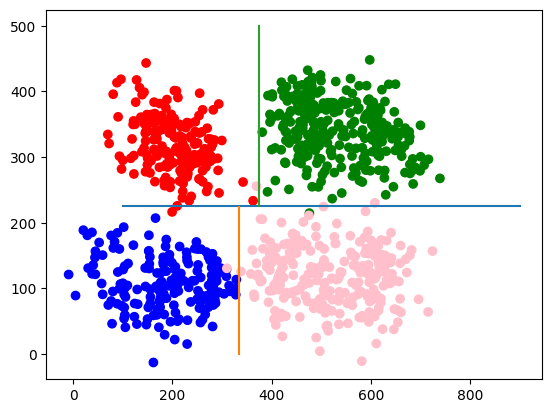

In [49]:
plt.scatter(df_4cat["coord_x"], df_4cat["coord_y"], c=df_4cat["category"].map({"a":"red", "b":"blue", "c":"green", "d":"pink"}))
plt.plot(prima_linie_coord_x, prima_linie_coord_y)
plt.plot(a_doua_linie_coord_x, a_doua_linie_coord_y)
plt.plot(a_treia_linie_coord_x, a_treia_linie_coord_y)

In [50]:
dt_model_4_cat.predict([[200, 100]])

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['b'], dtype=object)

In [51]:
dt_model_4_cat.predict([[850, 70]])

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['d'], dtype=object)